# Project 1: Driving Licenses, Traffic Accidents and Casualties Analysis

## Problem Statment

We would like to determine a way to reduce accidents on Saudi roads, our research will focus on two main points relating to this:
- whether there is a relationship between number of licenses issued and no. of accidents, and if we can utilize licenses as a predictor of accidents. If so what actions can be taken in relation to license issuance to lower accidents
- study whether the new traffic fines imposed at the end of 2016 had an effect on accidents in 2017, and whether increasing fines is a viable tactic for accident reduction

## Executive Summary
Write an executive summary that summarizes the problem and your key findings.

### Contents:
- [Datasets Description](#Datasets-Description)
- [Data Import & Cleaning](#Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-data)
- [Descriptive and Inferential Statistics](#Descriptive-and-Inferential-Statistics)
- [Outside Research](#Outside-Research)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

**If you combine your problem statement, executive summary, data dictionary, and conclusions/recommendations, you have an amazing README.md file that quickly aligns your audience to the contents of your project.** Don't forget to cite your data sources!

*All libraries used should be added here, including any Jupyter magic commands*

In [1]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

%matplotlib inline

## Datasets Description

[Driving Licenses](https://datasource.kapsarc.org/explore/dataset/saudi-arabia-driving-licenses-issued-in-the-kingdom-2004-2008/information/?disjunctive.administritive_area&sort=time_period&location=5,24.37495,45.08024&basemap=jawg.streets)
This dataset contains Saudi Arabia Driving Licenses Issued By Administrative Area for 1993 - 2016. Data from General Authority for Statistics . Follow datasource.kapsarc.org for timely data to advance energy economics research.

[Traffic Accidents and Casualties](https://datasource.kapsarc.org/explore/dataset/saudi-arabia-traffic-accidents-and-casualties-injured-dead-2008/export/?disjunctive.region&disjunctive.indicator&sort=time_period)
This dataset contains Saudi Arabia Traffic Accidents and Casualties by Region for 2016. Data from General Authority for Statistics. Follow datasource.kapsarc.org for timely data to advance energy economics research.


## Data Import and Cleaning

#### 1. Read In Driving Licenses & Traffic Accidents Data
Read in the `saudi-arabia-traffic-accidents-2008.csv` and `saudi-arabia-driving-licenses-2004-2008.csv` files and assign them to appropriately named pandas dataframes.

In [2]:
# Read in datasets from csv to pandas dataframes, load only useful columns
acc_columns = ['Year', 'Region', 'Indicator', 'Value', 'geo_point_2d']
lic_columns = ['Year', 'Administritive Area', 'Driving Liceses', 'geo_point_2d']

accidents = pd.read_csv('../data/saudi-arabia-traffic-accidents-2008.csv', sep=';', usecols=acc_columns)
licenses = pd.read_csv('../data/saudi-arabia-driving-licenses-2004-2008.csv', sep=';', usecols=lic_columns)

#### 2. Display data

Print the first 10 rows of each dataframe to your jupyter notebook

In [3]:
# Check dataframes using .head() & .tail() and .shape
accidents.head(10)

,Year,Region,Indicator,Value,geo_point_2d
0,(2016),Makkah,No. of Casualties - Injured,12383n,"21.628962766, 41.2636898334"
1,(2016),Eastern Region,No. of Casualties - Dead,1113n,"23.2883307307, 50.1478302439"
2,(2016),Tabouk,No. of Casualties - Dead,434n,"27.90165499, 37.2598581394"
3,(2016),Hail,No. of Casualties - Dead,299n,"27.400845724, 41.4406960508"
4,(2016),Hail,No. of Accidents,10199n,"27.400845724, 41.4406960508"
5,(2016),Northern Boarder,No. of Casualties - Dead,193n,"30.197074783, 41.8171186952"
6,(2017),Jazan,No. of Accidents,22161n,"17.2072313962, 42.6525807422"
7,(2017),Al-Jouf,No. of Accidents,10469n,"29.9677445762, 39.5570371172"
8,(2017),Total,No. of Casualties - Dead,7489n,NaN
9,(2016),Northern Boarder,No. of Casualties - Injured,631n,"30.197074783, 41.8171186952"


In [4]:
accidents.tail()

,Year,Region,Indicator,Value,geo_point_2d
79,(2017),Asir,No. of Casualties - Injured,2368n,"19.1387847401, 42.941470036"
80,(2017),Hail,No. of Casualties - Injured,773n,"27.400845724, 41.4406960508"
81,(2017),Al-Baaha,No. of Casualties - Dead,134n,"20.1484058503, 41.4665484892"
82,(2017),Al-Baaha,No. of Accidents,1414n,"20.1484058503, 41.4665484892"
83,(2017),Al-Baaha,No. of Casualties - Injured,1007n,"20.1484058503, 41.4665484892"


In [5]:
accidents.shape

(84, 5)

In [6]:
licenses.head(10)

,Year,Administritive Area,Driving Liceses,geo_point_2d
0,(2012),Makkah,143954n,"21.628962766, 41.2636898334"
1,(1994),Makkah,75349n,"21.628962766, 41.2636898334"
2,(1998),Makkah,86082n,"21.628962766, 41.2636898334"
3,(2004),Makkah,86636n,"21.628962766, 41.2636898334"
4,(2005),Makkah,65099n,"21.628962766, 41.2636898334"
5,(2008),Makkah,77013n,"21.628962766, 41.2636898334"
6,(2014),Madinah,31447n,"24.927534539, 39.4918237173"
7,(2013),Madinah,28513n,"24.927534539, 39.4918237173"
8,(2012),Madinah,14459n,"24.927534539, 39.4918237173"
9,(1994),Madinah,3767n,"24.927534539, 39.4918237173"


In [7]:
licenses.tail()

,Year,Administritive Area,Driving Liceses,geo_point_2d
345,(2000),Tabouk,8473n,"27.90165499, 37.2598581394"
346,(2006),Tabouk,8259n,"27.90165499, 37.2598581394"
347,(2013),Hail,9731n,"27.400845724, 41.4406960508"
348,(1997),Hail,6606n,"27.400845724, 41.4406960508"
349,(1999),Hail,3139n,"27.400845724, 41.4406960508"


In [8]:
licenses.shape

(350, 4)

#### 3. Briefly describe the data

Take your time looking through the data and briefly describe the data in the markdown cell below. Note things about what the columns might mean, and the general information that is conveyed in the dataframe.

Answer:
- The accidents dataframe consists of yearly data (2016-2017) about vehicle accidents for regions in KSA, with various variables and values presented in a long format, also has a geo point column
- The licenses dataframe consists of yearly data over 25 years about the number of licenses issued per region in KSA, also has a geo point column as in accidents

#### 4a. How complete is the data?

Investigate missing values etc.

In [9]:
accidents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 5 columns):
Year            84 non-null object
Region          84 non-null object
Indicator       84 non-null object
Value           84 non-null object
geo_point_2d    78 non-null object
dtypes: object(5)
memory usage: 3.4+ KB


In [10]:
licenses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 4 columns):
Year                   350 non-null object
Administritive Area    350 non-null object
Driving Liceses        350 non-null object
geo_point_2d           325 non-null object
dtypes: object(4)
memory usage: 11.0+ KB


### The geopoint column seems to be missing some entries in both accidents & licenses. All other observations seem to be nun-null with 84 & 350 entries respectively for other columns in accidents and licenses

#### 4b. Are there any obvious issues with the observations?

**What is the minimum *possible* value for each dataset? What is the maximum *possible* value?**

In [11]:
print(accidents.min())
print(accidents.max())

Year                   (2016)
Region               Al-Baaha
Indicator    No. of Accidents
Value                   1007n
dtype: object
Year                              (2017)
Region                             Total
Indicator    No. of Casualties - Injured
Value                             99925n
dtype: object


In [12]:
print(licenses.min())
print(licenses.max())

Year                    (1993)
Administritive Area    Al-Baha
Driving Liceses        100291n
dtype: object
Year                   (2017)
Administritive Area     Total
Driving Liceses         9983n
dtype: object


Data cannot be properly interpreted because of data type mismatch

In [13]:
accidents.describe()

,Year,Region,Indicator,Value,geo_point_2d
count,84,84,84,84,78
unique,2,14,3,84,13
top,(2017),Northern Boarder,No. of Casualties - Injured,81433n,"21.628962766, 41.2636898334"
freq,42,6,28,1,6


In [14]:
accidents.Indicator.unique()

array(['No. of Casualties - Injured', 'No. of Casualties - Dead',
       'No. of Accidents'], dtype=object)

In [15]:
# check year range for dataset
accidents.Year.value_counts()

(2017)    42
(2016)    42
Name: Year, dtype: int64

In [16]:
licenses.describe()

,Year,Administritive Area,Driving Liceses,geo_point_2d
count,350,350,350,325
unique,25,14,350,13
top,(2004),Eastern,3425n,"26.1967063704, 43.3429998455"
freq,14,25,1,25


In [17]:
# check year range for dataset
licenses.Year.value_counts().sort_index()

(1993)    14
(1994)    14
(1995)    14
(1996)    14
(1997)    14
(1998)    14
(1999)    14
(2000)    14
(2001)    14
(2002)    14
(2003)    14
(2004)    14
(2005)    14
(2006)    14
(2007)    14
(2008)    14
(2009)    14
(2010)    14
(2011)    14
(2012)    14
(2013)    14
(2014)    14
(2015)    14
(2016)    14
(2017)    14
Name: Year, dtype: int64

#### 5. What are your data types? 
Display the data types of each feature. 

In [18]:
# check data types with .dtypes()
accidents.dtypes

Year            object
Region          object
Indicator       object
Value           object
geo_point_2d    object
dtype: object

In [19]:
licenses.dtypes

Year                   object
Administritive Area    object
Driving Liceses        object
geo_point_2d           object
dtype: object

What did you learn?
- Do any of them seem odd?  
- Which ones are not as they should be?  

Answer:

- all columns for both datasets are of dtype object which usually means they are in string form
- Year could be numeric or a datetime, Region/Area a category, and driving 'liceses' & most values as numeric data after correcting them

#### 6. Fix incorrect data types
Based on what you discovered above, use appropriate methods to re-type incorrectly typed data.
- Define a function that will allow you to convert numerical columns to an appropriate numeric type. Use `map` or `apply` to change these columns in each dataframe.

In [20]:
def col_to_numeric(x):
    try:
        num_x = int(x)
        return num_x
    except:
        print('UNSUCCESFUL, CANNOT BE CONVERTED TO INT')

- Make new columns `x` and `y` using `geo_point_2d`

In [21]:
# get x and y geo columns
accidents['x'] = accidents['geo_point_2d'].str.replace(' ', '').apply(lambda x: str(x)[:str(x).find(',')])
accidents['y'] = accidents['geo_point_2d'].str.replace(' ', '').apply(lambda y: str(y)[str(y).find(',')+1:])
accidents.head()

,Year,Region,Indicator,Value,geo_point_2d,x,y
0,(2016),Makkah,No. of Casualties - Injured,12383n,"21.628962766, 41.2636898334",21.628962766,41.2636898334
1,(2016),Eastern Region,No. of Casualties - Dead,1113n,"23.2883307307, 50.1478302439",23.2883307307,50.1478302439
2,(2016),Tabouk,No. of Casualties - Dead,434n,"27.90165499, 37.2598581394",27.90165499,37.2598581394
3,(2016),Hail,No. of Casualties - Dead,299n,"27.400845724, 41.4406960508",27.400845724,41.4406960508
4,(2016),Hail,No. of Accidents,10199n,"27.400845724, 41.4406960508",27.400845724,41.4406960508


In [22]:
licenses['x'] = licenses['geo_point_2d'].str.replace(' ', '').apply(lambda x: str(x)[:str(x).find(',')])
licenses['y'] = licenses['geo_point_2d'].str.replace(' ', '').apply(lambda y: str(y)[str(y).find(',')+1:])
licenses.head()

,Year,Administritive Area,Driving Liceses,geo_point_2d,x,y
0,(2012),Makkah,143954n,"21.628962766, 41.2636898334",21.628962766,41.2636898334
1,(1994),Makkah,75349n,"21.628962766, 41.2636898334",21.628962766,41.2636898334
2,(1998),Makkah,86082n,"21.628962766, 41.2636898334",21.628962766,41.2636898334
3,(2004),Makkah,86636n,"21.628962766, 41.2636898334",21.628962766,41.2636898334
4,(2005),Makkah,65099n,"21.628962766, 41.2636898334",21.628962766,41.2636898334


- Fix any individual values preventing other columns from being the appropriate type.

In [23]:
accidents.Region.unique(), licenses['Administritive Area'].unique()

(array(['Makkah', 'Eastern Region', 'Tabouk', 'Hail', 'Northern Boarder',
        'Jazan', 'Al-Jouf', 'Total', 'Al-Baaha', 'Riyadh', 'Madinah',
        'Qassim', 'Najran', 'Asir'], dtype=object),
 array(['Makkah', 'Madinah', 'Al-Qaseem', 'Eastern', 'Assir', 'Tabouk',
        'Hail', 'Northern Boarder', 'Jazan', 'Najran', 'Al-Baha',
        'Al-Jouf', 'Total', 'Riyadh'], dtype=object))

In [24]:
# fix value issues including typos and differing names between dfs
accidents['Year'] = accidents['Year'].str.replace('(', '').str.replace(')', '')
accidents['Value'] = accidents['Value'].str.replace('n', '')
accidents['Region'] = accidents['Region'].str.replace('Boarder', 'Border')
accidents['Region'] = accidents['Region'].str.replace('Assir', 'Asir')
accidents.head()

,Year,Region,Indicator,Value,geo_point_2d,x,y
0,2016,Makkah,No. of Casualties - Injured,12383,"21.628962766, 41.2636898334",21.628962766,41.2636898334
1,2016,Eastern Region,No. of Casualties - Dead,1113,"23.2883307307, 50.1478302439",23.2883307307,50.1478302439
2,2016,Tabouk,No. of Casualties - Dead,434,"27.90165499, 37.2598581394",27.90165499,37.2598581394
3,2016,Hail,No. of Casualties - Dead,299,"27.400845724, 41.4406960508",27.400845724,41.4406960508
4,2016,Hail,No. of Accidents,10199,"27.400845724, 41.4406960508",27.400845724,41.4406960508


In [25]:
licenses['Year'] = licenses['Year'].str.replace('(', '').str.replace(')', '')
licenses['Driving Liceses'] = licenses['Driving Liceses'].str.replace('n', '')
licenses['Administritive Area'] = licenses['Administritive Area'].str.replace('Boarder', 'Border')
licenses['Administritive Area'] = licenses['Administritive Area'].str.replace('Assir', 'Asir')
licenses['Administritive Area'] = licenses['Administritive Area'].str.replace('Al-Baha', 'Al-Baaha')
licenses['Administritive Area'] = licenses['Administritive Area'].str.replace('Eastern', 'Eastern Region')
licenses['Administritive Area'] = licenses['Administritive Area'].str.replace('Al-Qaseem', 'Qassim')
licenses.head()

,Year,Administritive Area,Driving Liceses,geo_point_2d,x,y
0,2012,Makkah,143954,"21.628962766, 41.2636898334",21.628962766,41.2636898334
1,1994,Makkah,75349,"21.628962766, 41.2636898334",21.628962766,41.2636898334
2,1998,Makkah,86082,"21.628962766, 41.2636898334",21.628962766,41.2636898334
3,2004,Makkah,86636,"21.628962766, 41.2636898334",21.628962766,41.2636898334
4,2005,Makkah,65099,"21.628962766, 41.2636898334",21.628962766,41.2636898334


- Finish your data modifications by making sure the columns are now typed appropriately.

In [26]:
# convert to numeric
accidents['Year'] = accidents.Year.apply(col_to_numeric)
accidents['Value'] = accidents.Value.apply(col_to_numeric)
accidents['Region'] = accidents.Region.astype('category')
licenses['Year'] = licenses.Year.apply(col_to_numeric)
licenses['Driving Liceses'] = licenses['Driving Liceses'].apply(col_to_numeric)
licenses['Administritive Area'] = licenses['Administritive Area'].astype('category')
accidents.head()

,Year,Region,Indicator,Value,geo_point_2d,x,y
0,2016,Makkah,No. of Casualties - Injured,12383,"21.628962766, 41.2636898334",21.628962766,41.2636898334
1,2016,Eastern Region,No. of Casualties - Dead,1113,"23.2883307307, 50.1478302439",23.2883307307,50.1478302439
2,2016,Tabouk,No. of Casualties - Dead,434,"27.90165499, 37.2598581394",27.90165499,37.2598581394
3,2016,Hail,No. of Casualties - Dead,299,"27.400845724, 41.4406960508",27.400845724,41.4406960508
4,2016,Hail,No. of Accidents,10199,"27.400845724, 41.4406960508",27.400845724,41.4406960508


In [27]:
licenses.head()

,Year,Administritive Area,Driving Liceses,geo_point_2d,x,y
0,2012,Makkah,143954,"21.628962766, 41.2636898334",21.628962766,41.2636898334
1,1994,Makkah,75349,"21.628962766, 41.2636898334",21.628962766,41.2636898334
2,1998,Makkah,86082,"21.628962766, 41.2636898334",21.628962766,41.2636898334
3,2004,Makkah,86636,"21.628962766, 41.2636898334",21.628962766,41.2636898334
4,2005,Makkah,65099,"21.628962766, 41.2636898334",21.628962766,41.2636898334


- Display the data types again to confirm they are correct.

In [28]:
accidents.dtypes

Year               int64
Region          category
Indicator         object
Value              int64
geo_point_2d      object
x                 object
y                 object
dtype: object

In [29]:
licenses.dtypes

Year                      int64
Administritive Area    category
Driving Liceses           int64
geo_point_2d             object
x                        object
y                        object
dtype: object

#### 7. Rename columns
Change the names of the columns to more expressive names so that you can tell the difference the Driving Licenses  columns and the & Traffic Accidents columns. Your solution should map all column names being changed at once (no repeated singular name-changes). **We will be combining these two datasets, and so you should name columns in an appropriate way**.

**Guidelines**:
- Column names should be all lowercase (you will thank yourself when you start pushing data to SQL later in the course)
- Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`.
- Column names should be unique and informative (the only feature that we actually share between dataframes is the state).
- Please also fix any typos you see in the column names.

In [30]:
# check columns
list(accidents.columns.values), list(licenses.columns.values)

(['Year', 'Region', 'Indicator', 'Value', 'geo_point_2d', 'x', 'y'],
 ['Year', 'Administritive Area', 'Driving Liceses', 'geo_point_2d', 'x', 'y'])

In [31]:
# fix column names and change admin area to region in licenses df to unify naming across dfs
accidents.columns = ['year', 'region', 'indicator', 'value', 'geo_point_2d', 'geo_point_lat', 'geo_point_long']
licenses.columns =['year', 'region', 'driving_licenses', 'geo_point_2d',  'geo_point_lat', 'geo_point_long']

In [32]:
accidents.head()

,year,region,indicator,value,geo_point_2d,geo_point_lat,geo_point_long
0,2016,Makkah,No. of Casualties - Injured,12383,"21.628962766, 41.2636898334",21.628962766,41.2636898334
1,2016,Eastern Region,No. of Casualties - Dead,1113,"23.2883307307, 50.1478302439",23.2883307307,50.1478302439
2,2016,Tabouk,No. of Casualties - Dead,434,"27.90165499, 37.2598581394",27.90165499,37.2598581394
3,2016,Hail,No. of Casualties - Dead,299,"27.400845724, 41.4406960508",27.400845724,41.4406960508
4,2016,Hail,No. of Accidents,10199,"27.400845724, 41.4406960508",27.400845724,41.4406960508


In [33]:
licenses.head()

,year,region,driving_licenses,geo_point_2d,geo_point_lat,geo_point_long
0,2012,Makkah,143954,"21.628962766, 41.2636898334",21.628962766,41.2636898334
1,1994,Makkah,75349,"21.628962766, 41.2636898334",21.628962766,41.2636898334
2,1998,Makkah,86082,"21.628962766, 41.2636898334",21.628962766,41.2636898334
3,2004,Makkah,86636,"21.628962766, 41.2636898334",21.628962766,41.2636898334
4,2005,Makkah,65099,"21.628962766, 41.2636898334",21.628962766,41.2636898334


In [34]:
# check license totals to infer whether licenses column is total issued licenses or total new licenses issued on that year
licenses[licenses.region == 'Total'].sort_values('year')

,year,region,driving_licenses,geo_point_2d,geo_point_lat,geo_point_long
60,1993,Total,294893,NaN,na,nan
61,1994,Total,303520,NaN,na,nan
240,1995,Total,251878,NaN,na,nan
316,1996,Total,237623,NaN,na,nan
315,1997,Total,289296,NaN,na,nan
317,1998,Total,338350,NaN,na,nan
145,1999,Total,332210,NaN,na,nan
163,2000,Total,273238,NaN,na,nan
147,2001,Total,264725,NaN,na,nan
146,2002,Total,282038,NaN,na,nan


##### Numbers seem to indicate that it refers to new licenses issued on that year

#### 8. Create a data dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

In [35]:
accidents.dtypes, licenses.dtypes

(year                 int64
 region            category
 indicator           object
 value                int64
 geo_point_2d        object
 geo_point_lat       object
 geo_point_long      object
 dtype: object, year                   int64
 region              category
 driving_licenses       int64
 geo_point_2d          object
 geo_point_lat         object
 geo_point_long        object
 dtype: object)

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**year**|*int*|Driving_Licenses/Traffic_Accidents|The year in which the observation happened, only 2 years in the accidents df, 25 years in the licenses| 
|**region**|*category*|Driving_Licenses/Traffic_Accidents|The administrative region in which the observation was conducted, 13 regions in KSA + country 'Total'| 
|**indicator**|*object*|Traffic_Accidents|The variable being measured in the observation, measures relating to accident and casualty numbers| 
|**value**|*int*|Traffic_Accidents|The integer value associated with the adjacent indicator|
|**driving_licenses**|*int*|Driving_Licenses|The number of driving licenses issued in each region category by year|
|**geo_point_2d**|*object*|Driving_Licenses/Traffic_Accidents|Representation of latitude and longitude of the geolocation of the region| 
|**geo_point_lat**|*object*|Traffic_Accidents|Represents latitude of regions geolocation| 
|**geo_point_long**|*object*|Traffic_Accidents|Represents longitude of regions geolocation| 

#### 9. Drop unnecessary rows

This study concerns accident and license in regions/area. Please do the followings:
0. Which rows are not associated with regions?
1. Confirm the numbers of all regions add up to total.
2. Remove the rows that are not associated with regions

In [36]:
# Any row with 'Total' as a region is unnecessary, let's check if totals are correct
# Step1: get totals for each year via groupby sum
acc_no_total = accidents[accidents.region != 'Total']
acc_no_total.groupby(['year', 'indicator']).sum()

value
year indicator                          
2016 No. of Accidents             533380
     No. of Casualties - Dead       9031
     No. of Casualties - Injured   38120
2017 No. of Accidents             460488
     No. of Casualties - Dead       7489
     No. of Casualties - Injured   33199

In [37]:
# Step2: compare with 'Total' rows
accidents[accidents.region == "Total"][['year', 'region', 'indicator', 'value']].sort_values(['year', 'indicator'])

,year,region,indicator,value
29,2016,Total,No. of Accidents,533380
77,2016,Total,No. of Casualties - Dead,9031
30,2016,Total,No. of Casualties - Injured,38120
68,2017,Total,No. of Accidents,460488
8,2017,Total,No. of Casualties - Dead,7489
69,2017,Total,No. of Casualties - Injured,33199


In [38]:
# do the same for licenses df
lic_no_total = licenses[licenses.region != 'Total']
lic_sum_totals = lic_no_total.groupby('year').sum()
lic_sum_totals.head()

,driving_licenses
year,
1993,294893
1994,303520
1995,251878
1996,237623
1997,289296


In [39]:
lic_totals = licenses[licenses.region == 'Total'].set_index('year').sort_index()[['driving_licenses']]
lic_totals.head()

,driving_licenses
year,
1993,294893
1994,303520
1995,251878
1996,237623
1997,289296


In [40]:
# test both dfs are equal
lic_sum_totals.equals(lic_totals)

True

### We asserted that the 'total' rows are equivalent to summing up the regions observations per year and therefore is redundant information that we can safely remove

In [41]:
# remove 'total' rows and confirm 6 rows removed from accidents and 25 from licenses
accidents = accidents[accidents.region != 'Total']
licenses = licenses[licenses.region != 'Total']
accidents.shape, licenses.shape

((78, 7), (325, 6))

#### 10a. Data formats
Is the License data in long or wide format? How about the Accident data? And why?

In [42]:
accidents.head(1)

,year,region,indicator,value,geo_point_2d,geo_point_lat,geo_point_long
0,2016,Makkah,No. of Casualties - Injured,12383,"21.628962766, 41.2636898334",21.628962766,41.2636898334


In [43]:
licenses.head(1)

,year,region,driving_licenses,geo_point_2d,geo_point_lat,geo_point_long
0,2012,Makkah,143954,"21.628962766, 41.2636898334",21.628962766,41.2636898334


### Accident data is in long format thanks to indicator and value columns while license data is in wide format

#### 10b. Changing formats
Which format would work best for both dataframes? Transform the datasets to the same format before merging in the next task.

In [44]:
# Wide format would work best so we will transform accidents to wide
acc_pivoted = accidents.pivot_table(index=['year', 'region', 'geo_point_2d', 'geo_point_lat', 'geo_point_long'], columns="indicator", values='value')

In [45]:
# format the new df and drop geo_point_2d column
acc_pivoted.columns.name = None
acc_pivot_columns_order = ['year', 'region', 'No. of Accidents', 'No. of Casualties - Dead', 'No. of Casualties - Injured', 'geo_point_lat', 'geo_point_long']
acc_pivoted = acc_pivoted.reset_index()[acc_pivot_columns_order]
acc_pivoted.head(2)

,year,region,No. of Accidents,No. of Casualties - Dead,No. of Casualties - Injured,geo_point_lat,geo_point_long
0,2016,Al-Baaha,3618,185,1227,20.1484058503,41.4665484892
1,2016,Al-Jouf,10212,245,920,29.9677445762,39.5570371172


In [46]:
# rename columns to lowercase conventions
acc_pivot_updated_columns = ['year', 'region', 'no_accidents', 'casualties_dead', 'casualties_injured', 'geo_point_lat', 'geo_point_long']
acc_pivoted.columns = acc_pivot_updated_columns
acc_pivoted

,year,region,no_accidents,casualties_dead,casualties_injured,geo_point_lat,geo_point_long
0,2016,Al-Baaha,3618,185,1227,20.1484058503,41.4665484892
1,2016,Al-Jouf,10212,245,920,29.9677445762,39.5570371172
2,2016,Asir,32684,983,2541,19.1387847401,42.941470036
3,2016,Eastern Region,101619,1113,4893,23.2883307307,50.1478302439
4,2016,Hail,10199,299,932,27.400845724,41.4406960508
5,2016,Jazan,25873,514,2259,17.2072313962,42.6525807422
6,2016,Madinah,14475,822,4184,24.927534539,39.4918237173
7,2016,Makkah,134838,2243,12383,21.628962766,41.2636898334
8,2016,Najran,3235,173,706,18.4511003068,46.8688495726
9,2016,Northern Border,13196,193,631,30.197074783,41.8171186952


#### 11. Merge dataframes

Join the Driving Licenses & Traffic Accidents dataframes using the **region** and **year** in each dataframe as the key. Assign this to a new variable. Which join should you use to preserve the most data?

In [47]:
# to preserve the most data we do an outer or left merge in this case
licenses.drop('geo_point_2d', axis=1).merge(acc_pivoted, on=['region', 'year', 'geo_point_lat', 'geo_point_long'], how='outer').sort_values('year').iloc[:, [0, 1, 2, 5, 6, 7, 3, 4]]

,year,region,driving_licenses,no_accidents,casualties_dead,casualties_injured,geo_point_lat,geo_point_long
207,1993,Najran,3769,NaN,NaN,NaN,18.4511003068,46.8688495726
192,1993,Tabouk,3174,NaN,NaN,NaN,27.90165499,37.2598581394
313,1993,Asir,6226,NaN,NaN,NaN,19.1387847401,42.941470036
167,1993,Makkah,65977,NaN,NaN,NaN,21.628962766,41.2636898334
34,1993,Northern Border,1510,NaN,NaN,NaN,30.197074783,41.8171186952
197,1993,Hail,10484,NaN,NaN,NaN,27.400845724,41.4406960508
126,1993,Al-Baaha,3270,NaN,NaN,NaN,20.1484058503,41.4665484892
300,1993,Qassim,73618,NaN,NaN,NaN,26.1967063704,43.3429998455
38,1993,Jazan,6009,NaN,NaN,NaN,17.2072313962,42.6525807422
307,1993,Eastern Region,9964,NaN,NaN,NaN,23.2883307307,50.1478302439


In [48]:
# in this case since we would like to compare licenses and accidents data we'll do an inner or right merge and organize
combined = licenses.drop('geo_point_2d', axis=1).merge(acc_pivoted, on=['region', 'year', 'geo_point_lat', 'geo_point_long'], how='inner').iloc[:, [0, 1, 2, 5, 6, 7, 3, 4]]
combined = combined.sort_values(['year', 'region']).reset_index(drop=True)
combined

,year,region,driving_licenses,no_accidents,casualties_dead,casualties_injured,geo_point_lat,geo_point_long
0,2016,Al-Baaha,4614,3618,185,1227,20.1484058503,41.4665484892
1,2016,Al-Jouf,9371,10212,245,920,29.9677445762,39.5570371172
2,2016,Asir,41367,32684,983,2541,19.1387847401,42.941470036
3,2016,Eastern Region,142307,101619,1113,4893,23.2883307307,50.1478302439
4,2016,Hail,54507,10199,299,932,27.400845724,41.4406960508
5,2016,Jazan,11504,25873,514,2259,17.2072313962,42.6525807422
6,2016,Madinah,24540,14475,822,4184,24.927534539,39.4918237173
7,2016,Makkah,136055,134838,2243,12383,21.628962766,41.2636898334
8,2016,Najran,2153,3235,173,706,18.4511003068,46.8688495726
9,2016,Northern Border,4958,13196,193,631,30.197074783,41.8171186952


#### 12. Save your cleaned, merged dataframe

Use a relative path to save out your data as `combined_datasets.csv`.

In [49]:
combined.to_csv('../data/combined_datasets.csv', index=False)

## Exploratory Data Analysis


### Summary Statistics
Transpose the output of pandas `describe` method to create a quick overview of each numeric feature.

In [50]:
combined.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
year,26.0,2016.500000,0.509902,2016.0,2016.00,2016.5,2017.00,2017.0
driving_licenses,26.0,62507.000000,107293.917762,2153.0,8363.25,16085.0,51222.00,495307.0
no_accidents,26.0,38225.692308,46493.705035,1414.0,10276.25,16050.5,30981.25,145541.0
casualties_dead,26.0,635.384615,549.783381,112.0,241.25,415.5,929.25,2243.0
casualties_injured,26.0,2743.038462,2922.641127,374.0,923.00,1618.5,3784.00,12383.0


#### Manually calculate standard deviation

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

- Write a function to calculate standard deviation using the formula above

In [51]:
# two methods, changed n to n-1 in second to get sample std not population
def std_dev_pop(series):
    return np.sqrt(((series - series.mean())**2).sum()/len(series))

def std_dev_sample(series):
    return np.sqrt(((series - series.mean())**2).sum()/(len(series)-1))

In [52]:
# same as in .describe()
std_dev_sample(combined.driving_licenses)

107293.9177620055

In [53]:
std_dev_pop(combined.driving_licenses)

105210.34237659337

In [54]:
np.std(combined.driving_licenses)

105210.34237659337

- Use a **dictionary comprehension** to apply your standard deviation function to each numeric column in the dataframe.  **No loops**  
- Assign the output to variable `sd` as a dictionary where: 
    - Each column name is now a key 
    - That standard deviation of the column is the value 
     
*Example Output :* `{'Driving_Licenses_x': 120, 'Traffic_Accidents_x': 120, ...}`

In [55]:
sd = {column:std_dev_sample(combined[column]) for column in combined[['driving_licenses', 'no_accidents', 'casualties_dead', 'casualties_injured']].columns}
sd

{'driving_licenses': 107293.9177620055,
 'no_accidents': 46493.70503521459,
 'casualties_dead': 549.7833811182784,
 'casualties_injured': 2922.6411272103765}

Do your manually calculated standard deviations match up with the output from pandas `describe`? What about numpy's `std` method?

Answer:

matches up with describe() because using sample std, would match with np.std() if population std

#### Investigate trends in the data
Using sorting and/or masking (along with the `.head` method to not print our entire dataframe), consider the following questions:

- Which regions have the highest and lowest Driving Licenses based on years (1993 - 2017)
- Which regions have the highest and lowest mean Traffic Accidents numbers for years (2016 - 2017)
- What are the regions that have more Driving Licenses issued in each year than the year average?
- What are the regions that have more Traffic Accidents happened in each year than the year average?

Based on what you've just observed, have you identified any regions that you're especially interested in? **Make a note of these and state *why* you think they're interesting**.

**You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

In [56]:
licenses.head(2)

,year,region,driving_licenses,geo_point_2d,geo_point_lat,geo_point_long
0,2012,Makkah,143954,"21.628962766, 41.2636898334",21.628962766,41.2636898334
1,1994,Makkah,75349,"21.628962766, 41.2636898334",21.628962766,41.2636898334


In [57]:
# lowest and highest Driving Licenses based on years (1993 - 2017)
# licenses[(licenses['driving_licenses'] == licenses.driving_licenses.max()) | (licenses['driving_licenses'] == licenses.driving_licenses.min())]
# the above calculated min and max for all 25 years

licenses[licenses.driving_licenses.isin(licenses.groupby('year')['driving_licenses'].max()) | \
         licenses.driving_licenses.isin(licenses.groupby('year')['driving_licenses'].min())].sort_values(['year','driving_licenses'])

,year,region,driving_licenses,geo_point_2d,geo_point_lat,geo_point_long
34,1993,Northern Border,1510,"30.197074783, 41.8171186952",30.197074783,41.8171186952
152,1993,Riyadh,103886,"23.0814341634, 45.5857512766",23.0814341634,45.5857512766
281,1994,Northern Border,1457,"30.197074783, 41.8171186952",30.197074783,41.8171186952
154,1994,Riyadh,110545,"23.0814341634, 45.5857512766",23.0814341634,45.5857512766
280,1995,Northern Border,1318,"30.197074783, 41.8171186952",30.197074783,41.8171186952
153,1995,Riyadh,101608,"23.0814341634, 45.5857512766",23.0814341634,45.5857512766
167,1996,Northern Border,1383,"30.197074783, 41.8171186952",30.197074783,41.8171186952
156,1996,Riyadh,110131,"23.0814341634, 45.5857512766",23.0814341634,45.5857512766
282,1997,Northern Border,1531,"30.197074783, 41.8171186952",30.197074783,41.8171186952
70,1997,Riyadh,92145,"23.0814341634, 45.5857512766",23.0814341634,45.5857512766


In [58]:
# highest and lowest mean Traffic Accidents numbers for years (2016 - 2017)
combined[(combined['no_accidents'].isin(combined.groupby('year')['no_accidents'].max())) | (combined['no_accidents'].isin(combined.groupby('year')['no_accidents'].min()))]

,year,region,driving_licenses,no_accidents,casualties_dead,casualties_injured,geo_point_lat,geo_point_long
8,2016,Najran,2153,3235,173,706,18.4511003068,46.8688495726
11,2016,Riyadh,242851,141736,1430,4207,23.0814341634,45.5857512766
13,2017,Al-Baaha,4131,1414,134,1007,20.1484058503,41.4665484892
20,2017,Makkah,142487,145541,1641,10623,21.628962766,41.2636898334


In [59]:
# What are the regions that have more Driving Licenses issued in each year than the year average?
mean_lic = licenses.groupby('year').mean().driving_licenses.values
mean_lic = dict(enumerate(mean_lic, 1993))
mean_lic = licenses['year'].map(mean_lic)
licenses[licenses['driving_licenses'] > mean_lic].sort_values('year')

,year,region,driving_licenses,geo_point_2d,geo_point_lat,geo_point_long
186,1993,Makkah,65977,"21.628962766, 41.2636898334",21.628962766,41.2636898334
152,1993,Riyadh,103886,"23.0814341634, 45.5857512766",23.0814341634,45.5857512766
325,1993,Qassim,73618,"26.1967063704, 43.3429998455",26.1967063704,43.3429998455
1,1994,Makkah,75349,"21.628962766, 41.2636898334",21.628962766,41.2636898334
154,1994,Riyadh,110545,"23.0814341634, 45.5857512766",23.0814341634,45.5857512766
89,1994,Qassim,68916,"26.1967063704, 43.3429998455",26.1967063704,43.3429998455
153,1995,Riyadh,101608,"23.0814341634, 45.5857512766",23.0814341634,45.5857512766
187,1995,Makkah,60356,"21.628962766, 41.2636898334",21.628962766,41.2636898334
14,1995,Qassim,49690,"26.1967063704, 43.3429998455",26.1967063704,43.3429998455
156,1996,Riyadh,110131,"23.0814341634, 45.5857512766",23.0814341634,45.5857512766


In [60]:
# What are the regions that have more Traffic Accidents happened in each year than the year average?
mean_acc = combined.groupby('year').mean().no_accidents.values
mean_acc = dict(enumerate(mean_acc, 2016))
mean_acc = combined['year'].map(mean_acc)
combined[combined['no_accidents'] > mean_acc].sort_values('year')

,year,region,driving_licenses,no_accidents,casualties_dead,casualties_injured,geo_point_lat,geo_point_long
3,2016,Eastern Region,142307,101619,1113,4893,23.2883307307,50.1478302439
7,2016,Makkah,136055,134838,2243,12383,21.628962766,41.2636898334
11,2016,Riyadh,242851,141736,1430,4207,23.0814341634,45.5857512766
16,2017,Eastern Region,126816,81433,963,4073,23.2883307307,50.1478302439
20,2017,Makkah,142487,145541,1641,10623,21.628962766,41.2636898334
24,2017,Riyadh,495307,99925,1399,4540,23.0814341634,45.5857512766


### Riyadh, Makkah and the Eastern Region seem like interesting regions because of how their values are almost always above the yearly averages, but this can be misleading since we have not normalized by population, naturally regions with higher populations will have more accidents and licenses issued. We will create per capita values in a later step to account for this and do a proper comparison

## Visualize the data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers.

Some recommendations on plotting:
- Plots have titles
- Plots have axis labels
- Plots have appropriate tick labels
- All text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Plots are interpreted to aid understanding

There is such a thing as too many plots, and there are a *lot* of bad plots. You might make some! (But hopefully not with the guided prompts below).

#### Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features

Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).

*example*:
```python
sns.heatmap(df.corr())
```

Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).

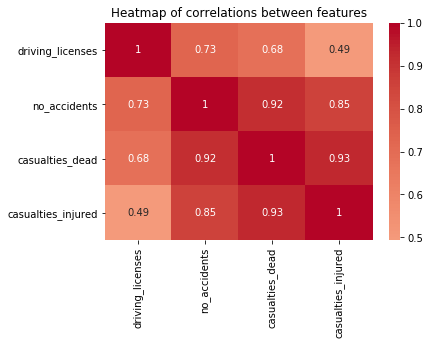

In [61]:
sns.heatmap(combined.iloc[:,2:6].corr(), annot=True, center=0, cmap='coolwarm')
plt.title('Heatmap of correlations between features');

#### Define a custom function to subplot histograms

We should write a function that will take the names of 2+ columns and subplot histograms. While you can use pandas plotting or Seaborn here, matplotlib gives you greater control over all aspects of your plots.

[Helpful Link for Plotting Multiple Figures](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes)

Here's some starter code:

In [62]:
def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels):
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize=(12,8)) # You'll want to specify your figsize
    fig.tight_layout(pad=5)
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        sns.distplot(dataframe[column], bins=20, ax=ax[i]) # feel free to add more settings
        ax[i].set_title(list_of_titles[i]) # Set titles, labels, etc here for each subplot
        ax[i].set_xlabel(list_of_xlabels[i])
        ax[i].set_ylabel('pdf')

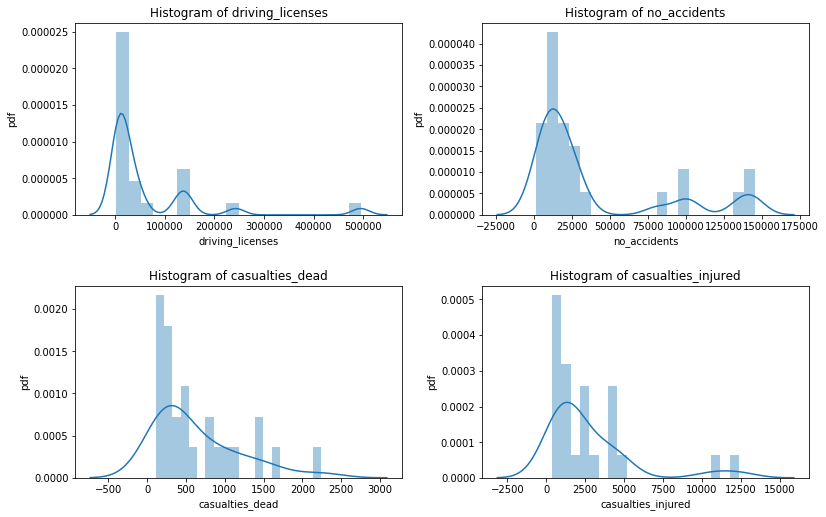

In [63]:
# test the function
plt_columns = ['driving_licenses', 'no_accidents', 'casualties_dead', 'casualties_injured']
subplot_histograms(combined, plt_columns, ["Histogram of " + column for column in plt_columns], plt_columns)

#### Plot and interpret histograms 
For each of the following:
- Driving Licenses number
- Traffic Accidents number

Please plot two additional histograms that will help with your understanding of the data

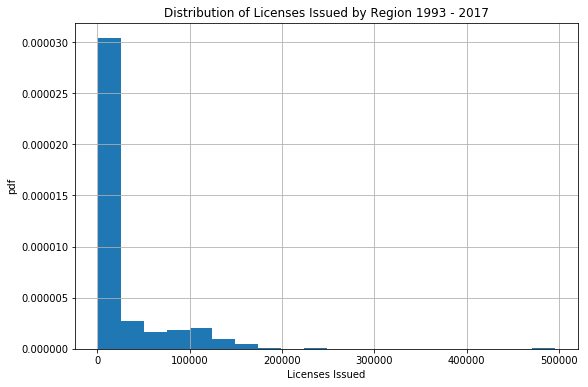

In [64]:
# licenses distribution for all 25 years
ax = licenses.driving_licenses.hist(bins = 20, figsize=(9, 6), density=True)
ax.set_xlabel("Licenses Issued")
ax.set_ylabel("pdf")
ax.set_title('Distribution of Licenses Issued by Region 1993 - 2017');

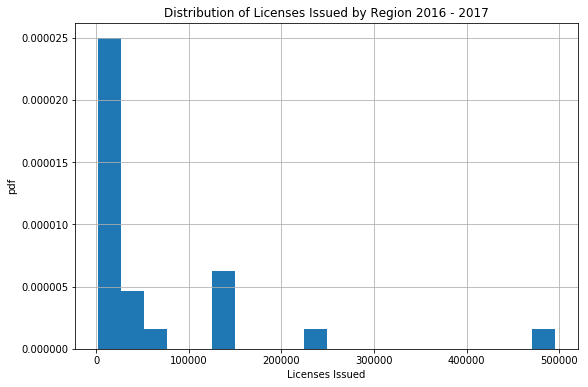

In [65]:
# licenses distribution for 2016-2017
ax = combined.driving_licenses.hist(bins = 20, figsize=(9, 6), density=True)
ax.set_xlabel("Licenses Issued")
ax.set_ylabel("pdf")
ax.set_title('Distribution of Licenses Issued by Region 2016 - 2017');

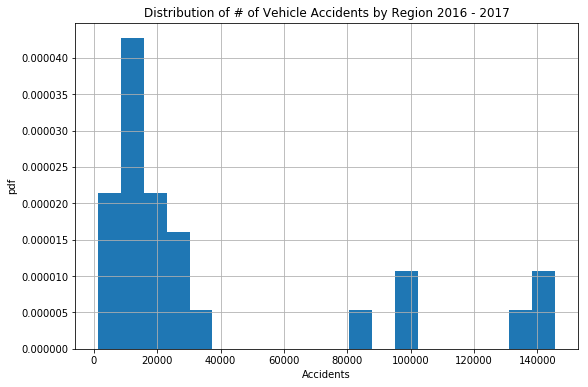

In [66]:
# accidents distribution for 2016-2017
ax = combined.no_accidents.hist(bins = 20, figsize=(9, 6), density=True)
ax.set_xlabel("Accidents")
ax.set_ylabel("pdf")
ax.set_title('Distribution of # of Vehicle Accidents by Region 2016 - 2017');

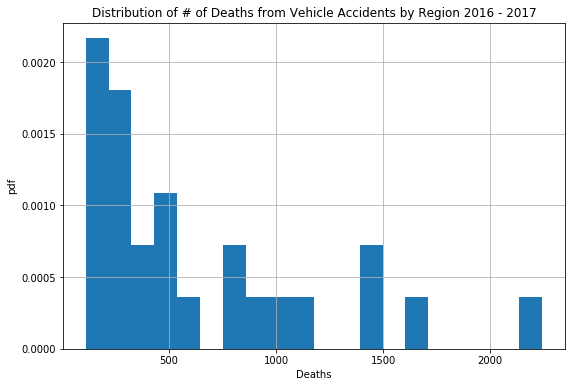

In [67]:
# deaths distribution for 2016-2017
ax = combined.casualties_dead.hist(bins = 20, figsize=(9, 6), density=True)
ax.set_xlabel("Deaths")
ax.set_ylabel("pdf")
ax.set_title('Distribution of # of Deaths from Vehicle Accidents by Region 2016 - 2017');

### From these histograms we can see that most regions have numbers on the lower end of the spectrum, with a few outliers to the right, most likely the Riyadh, Makkah and Eastern regions. Again this is most likely due to the uneven distribution of the population across the 13 regions. We will create per thousand capita values and test to see if this assumption is true

#### Plot and interpret scatter plots

For each of the following:
- Driving Licenses vs. Traffic Accidents for 2017
- Driving Licenses vs. Traffic Accidents for 2016
- Driving Licenses for 2016 vs 2017
- Traffic Accidents for 2016 vs 2017

Plot the two variables against each other using matplotlib or Seaborn

Your plots should show:
- Two clearly labeled axes
- A proper title
- Using colors and symbols that are clear and unmistakable

**Feel free to write a custom function, and subplot if you'd like.** Functions save both time and space.


In [68]:
# Split data by year
combined2016 = combined.set_index('year').loc[2016,:].reset_index()
combined2017 = combined.set_index('year').loc[2017,:].reset_index()
combined2016.shape, combined2017.shape

((13, 8), (13, 8))

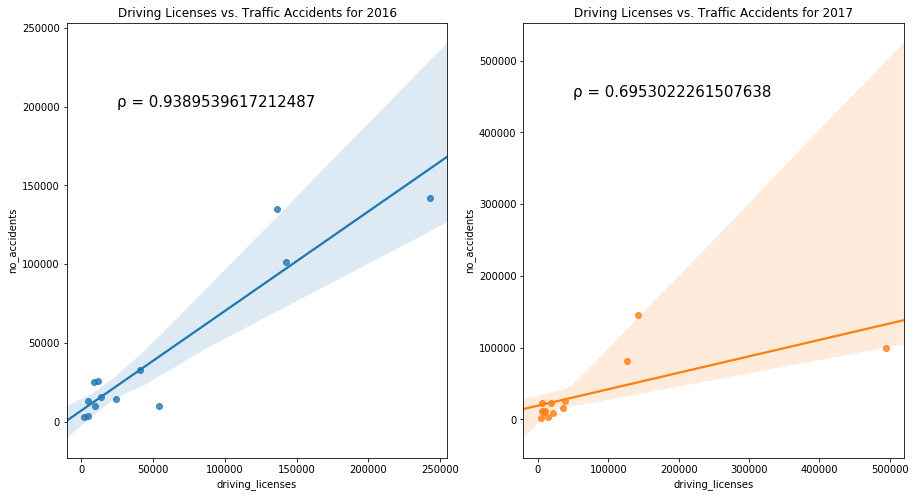

In [69]:
# Driving Licenses vs. Traffic Accidents for 2017 & 2016
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,8))
sns.regplot(combined2016.driving_licenses, combined2016.no_accidents, ax=ax[0])
ax[0].set_title('Driving Licenses vs. Traffic Accidents for 2016')
ax[0].text(25000, 200000, 'ρ = '+str(np.corrcoef(combined2016.driving_licenses, combined2016.no_accidents)[0,1]), fontsize=15)
sns.regplot(combined2017.driving_licenses, combined2017.no_accidents, ax=ax[1])
ax[1].set_title('Driving Licenses vs. Traffic Accidents for 2017')
ax[1].text(50000, 450000, 'ρ = '+str(np.corrcoef(combined2017.driving_licenses, combined2017.no_accidents)[0,1]), fontsize=15);

### The strong positive correlation seems to suggest that licenses issued and # of accidents increase together, but this might be due to a correlation between population and both values. Adjusting to per capita might help us identify a real trend if there is any. The relationship in 2016 is stronger than in 2017

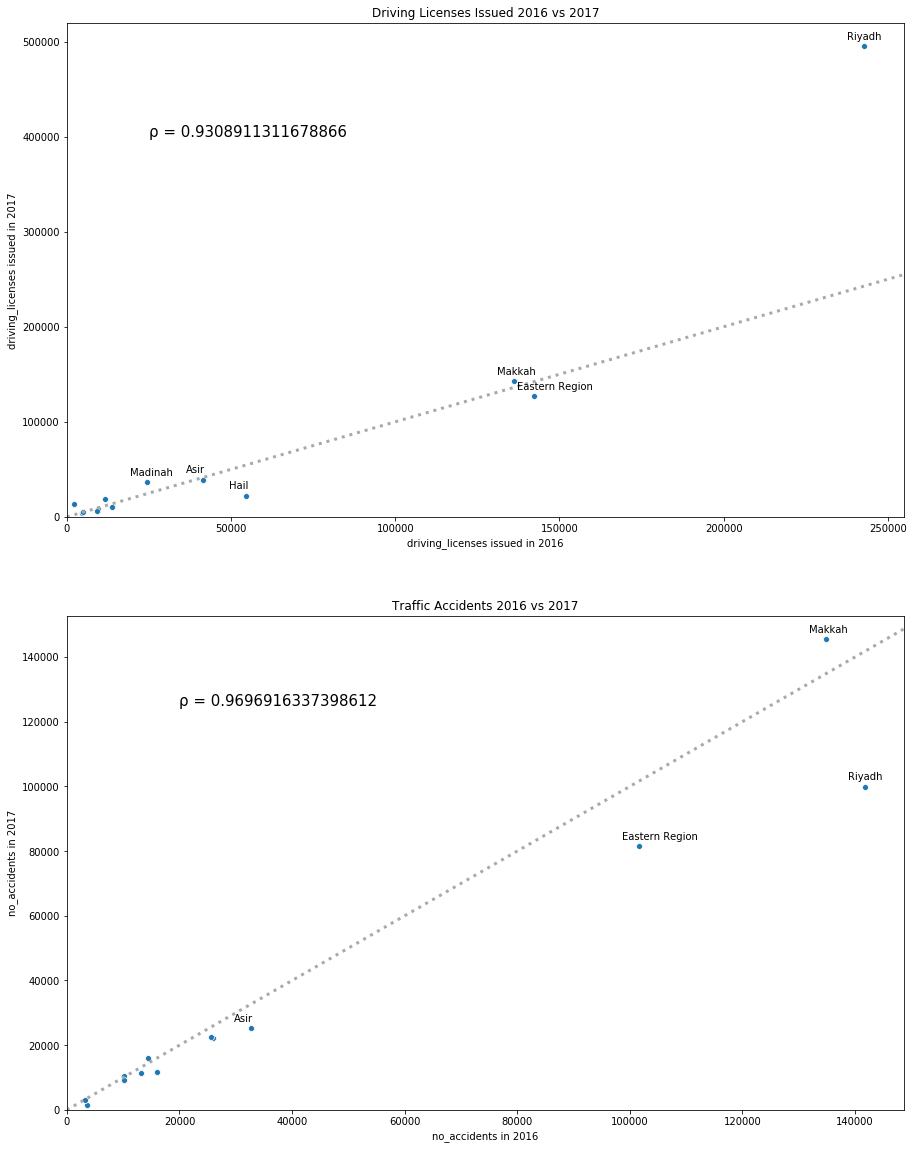

In [70]:
# Driving Licenses 2016 vs 2017 - Accidents 2016 vs 2017
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(15,20))
sns.scatterplot(combined2016.driving_licenses, combined2017.driving_licenses, ax=ax[0])
ax[0].set_title('Driving Licenses Issued 2016 vs 2017')
ax[0].set_xlabel(ax[0].get_xlabel() + ' issued in 2016')
ax[0].set_ylabel(ax[0].get_ylabel() + ' issued in 2017')
ax[0].text(25000, 400000, 'ρ = '+str(np.corrcoef(combined2016.driving_licenses, combined2017.driving_licenses)[0,1]), fontsize=15)
for i, row in combined2016.reset_index().iterrows():
    if row.driving_licenses > 22000:
            x_y = (row.driving_licenses, combined2017.iloc[i,:].driving_licenses)
            ax[0].annotate(row.region, x_y, xytext=(-17, 7), textcoords='offset points')

sns.scatterplot(combined2016.no_accidents, combined2017.no_accidents, ax=ax[1])
ax[1].set_title('Traffic Accidents 2016 vs 2017')
ax[1].set_xlabel(ax[1].get_xlabel() + ' in 2016')
ax[1].set_ylabel(ax[1].get_ylabel() + ' in 2017')
ax[1].text(20000, 125000, 'ρ = '+str(np.corrcoef(combined2016.no_accidents, combined2017.no_accidents)[0,1]), fontsize=15)
for i, row in combined2016.reset_index().iterrows():
    if row.no_accidents > 30000:
        x_y = (row.no_accidents, combined2017.iloc[i,:].no_accidents)
        ax[1].annotate(row.region, x_y, xytext=(-17, 7), textcoords='offset points')
    
for a in ax:
    xbottom, xtop = a.get_xlim()
    ybottom, ytop = a.get_ylim()
    a.set_xlim(0, xtop)
    a.set_ylim(0, ytop)
    limit = (0, xtop if xtop > ytop else ytop)
    a.plot(limit, limit, linestyle=':', color='darkgrey', linewidth=3)

### The dotted line represents where the observations would be with 0% growth year-over-year 2016 to 2017, observations below the line represent a reduction in 2017, there was growth for observations above the line. Licenses seem pretty stable sticking close to the line except for Riyadh where we see a huge jump in 2017, almost double that of 2016. The # of accidents seems to be decreasing in general with most observations below the line. An exception seems to be Makkah where accidents increased in 2017, further study is necessary to see if this decrease can be attributed to random chance

#### Plot and interpret boxplots

For each numeric variable in the dataframe create a boxplot using Seaborn. Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.

Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).

Each boxplot should:
- Only include variables of a similar scale
- Have clear labels for each variable
- Have appropriate titles and labels

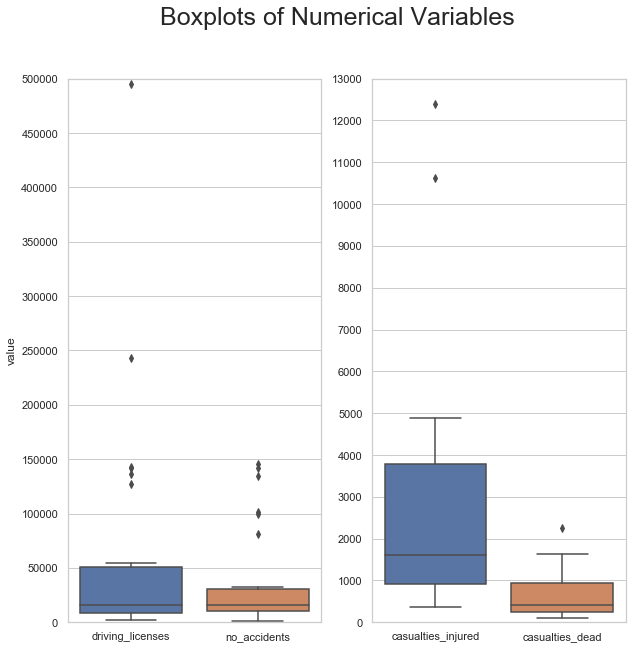

In [71]:
# boxplots for licenses, accidents and casualties
sns.set(style="whitegrid")
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,10))
fig.suptitle('Boxplots of Numerical Variables', fontsize=25)
ax[0].set_ylim(0, 500000)
ax[0].set_yticks(range(0, 500001, 50000))
ax[0].set_ylabel('value')
ax[1].set_ylim(0, 13000)
ax[1].set_yticks(range(0, 13001, 1000))
sns.boxplot(data=combined[['driving_licenses', 'no_accidents']], ax=ax[0])
sns.boxplot(data=combined[['casualties_injured', 'casualties_dead']], ax=ax[1]);

### We notice that all values are skewed to the right, this pull seems to be from the regions with a much larger population than the rest (the usual suspects: Riyadh, Makkah, and Eastern province). Even more reason to do a per capita analysis

## Descriptive and Inferential Statistics

#### Summarizing Distributions

Above, we used pandas `describe` to provide quick summary statistics of our numeric columns. We also demonstrated many visual relationships.

As data scientists, having a complete understanding of data is imperative prior to modeling.

While we will continue to build our analytic tools, we know that measures of *central tendency*, *spread*, and *shape/skewness* provide a quick summary of distributions.

For each variable in your data, summarize the underlying distributions (in words & statistics)
 - Be thorough in your verbal description of these distributions.
 - Be sure to back up these summaries with statistics.

In [72]:
combined[['driving_licenses', 'no_accidents', 'casualties_injured','casualties_dead']].describe()

,driving_licenses,no_accidents,casualties_injured,casualties_dead
count,26.000000,26.000000,26.000000,26.000000
mean,62507.000000,38225.692308,2743.038462,635.384615
std,107293.917762,46493.705035,2922.641127,549.783381
min,2153.000000,1414.000000,374.000000,112.000000
25%,8363.250000,10276.250000,923.000000,241.250000
50%,16085.000000,16050.500000,1618.500000,415.500000
75%,51222.000000,30981.250000,3784.000000,929.250000
max,495307.000000,145541.000000,12383.000000,2243.000000


Answers:

All 4 variables measured are positively skewed therefore we can't gain much insight using the standard deviation. We suspect the reason behind this is the huge population in the 3 major regions in comparison to the other 10 regions

#### We generally assuming that data we sample from a population will be normally distributed. Do we observe this trend?

Answer:

None of the distributions observed are normal. All are positively skewed

Does This Assumption Hold for:
    - Driving Licenses
    - Traffic Accidents
Explain your answers for each distribution and how you think this will affect estimates made from these data.

Answer:

The mean is not a proper measure of a 'center' in this case, but adjusting for population per region might yield better results, which is what we will do in the following steps

## Outside Research

Based upon your observations, choose **three** regions that demonstrate interesting trends in the number of driving licenses and traffic accidents. Spend some time doing outside research on provincial and central policies that might influence these rates, and summarize your findings below. **Feel free to go back and create new plots that highlight these states of interest**. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. (Make sure that you cite your sources -- check with you local instructor for citation preferences).

Answer:

Based on our observations the most interesting regions are Riyadh, Makkah, and the Eastern Region as they produce the highest effect on the data because of the size of their values. We attribute this weight to the sheer size in terms of population, we will test this assumption by adjusting all observations to per thousand capita and seeing if this will yield a more normal distribution across regions.

### We have sourced population data for each region in 2016 & 2017 from sources: 
- https://www.stats.gov.sa/sites/all/modules/pubdlcnt/pubdlcnt.php?file=https://www.stats.gov.sa/sites/default/files/en-demographic-research-2016_1.xls&nid=9839
- https://www.stats.gov.sa/sites/all/modules/pubdlcnt/pubdlcnt.php?file=https://www.stats.gov.sa/sites/default/files/population_characteristics_surveys_0.xlsx&nid=20930

we'll be creating a new column in our DataFrame with this data

### to do our per capita calculation for licenses & no. of accidents we will use the population of males 15 years up to 80 as they were the legal drivers up to 2018 and we assume the percentage of people over 80 who drive is negligible, for injuries and deaths we will use total population since it includes the whole population

In [73]:
# import the population data into a df
population = pd.read_csv("../data/population_saudi_region_2016-2017.csv")
population.head()

,year,region,males_over_15,total_population
0,2016,Riyadh,3723631,8002100
1,2016,Makkah,3721579,8325304
2,2016,Madinah,887182,2080436
3,2016,Qassim,623023,1387996
4,2016,Eastern Region,2257284,4780619


In [74]:
# divide population by 1000 to get data per thousand and add it to combined
population[['males_over_15', 'total_population']] = population[['males_over_15', 'total_population']].applymap(lambda x: x/1000)
population = population.rename({'males_over_15':'k_males_over_15', 'total_population':'k_total_population'}, axis="columns")
population.head(2)

,year,region,k_males_over_15,k_total_population
0,2016,Riyadh,3723.631,8002.100
1,2016,Makkah,3721.579,8325.304


In [75]:
combined = combined.merge(population, on=['year', 'region'], how='inner').iloc[:,[0,1,2,3,4,5,8,9,6,7]]

In [76]:
combined.head(2)

,year,region,driving_licenses,no_accidents,casualties_dead,casualties_injured,k_males_over_15,k_total_population,geo_point_lat,geo_point_long
0,2016,Al-Baaha,4614,3618,185,1227,191.950,466.384,20.1484058503,41.4665484892
1,2016,Al-Jouf,9371,10212,245,920,207.451,497.509,29.9677445762,39.5570371172


In [77]:
# let's test the assumption that population plays a role in the variable values per region by checking correlation
combined[['driving_licenses', 'no_accidents', 'casualties_dead', 'casualties_injured', 'k_males_over_15', 'k_total_population']].corr()[['k_males_over_15', 'k_total_population']].T[['driving_licenses', 'no_accidents', 'casualties_dead', 'casualties_injured']]

,driving_licenses,no_accidents,casualties_dead,casualties_injured
k_males_over_15,0.832035,0.973585,0.932959,0.849919
k_total_population,0.819856,0.972909,0.943266,0.864076


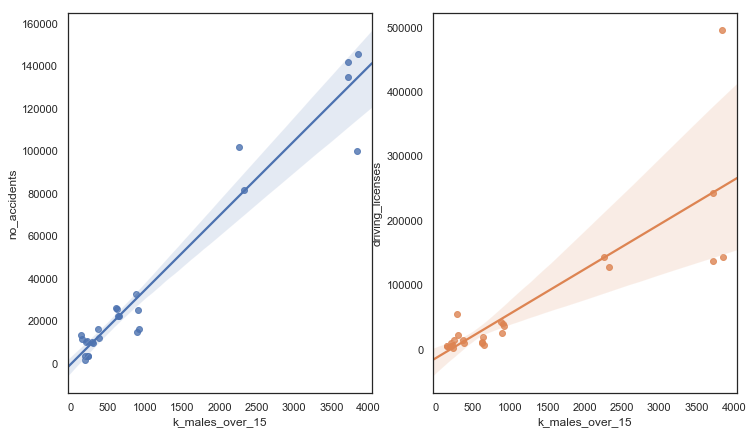

In [78]:
sns.set_style("white")
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,7))
sns.regplot(combined.k_males_over_15, combined.no_accidents, ax=ax[0])
sns.regplot(combined.k_males_over_15, combined.driving_licenses, ax=ax[1]);

### As expected we see a strong positive correlation between population and both accidents and licenses issued, adjusting for this we should be able to see if there is a true underlying relationship between licenses and accidents

In [79]:
# create an adjusted df per thousand capita
combined_per_k = combined.copy()
combined_per_k.driving_licenses = combined.driving_licenses / combined.k_males_over_15
combined_per_k.no_accidents = combined.no_accidents / combined.k_males_over_15
combined_per_k.casualties_dead = combined.casualties_dead / combined.k_total_population
combined_per_k.casualties_injured = combined.casualties_injured / combined.k_total_population
combined_per_k.drop(['geo_point_lat', 'geo_point_long', 'k_males_over_15', 'k_total_population'], axis=1, inplace=True)
combined_per_k.head(2)

,year,region,driving_licenses,no_accidents,casualties_dead,casualties_injured
0,2016,Al-Baaha,24.037510,18.848659,0.396669,2.630879
1,2016,Al-Jouf,45.172113,49.226082,0.492453,1.849213


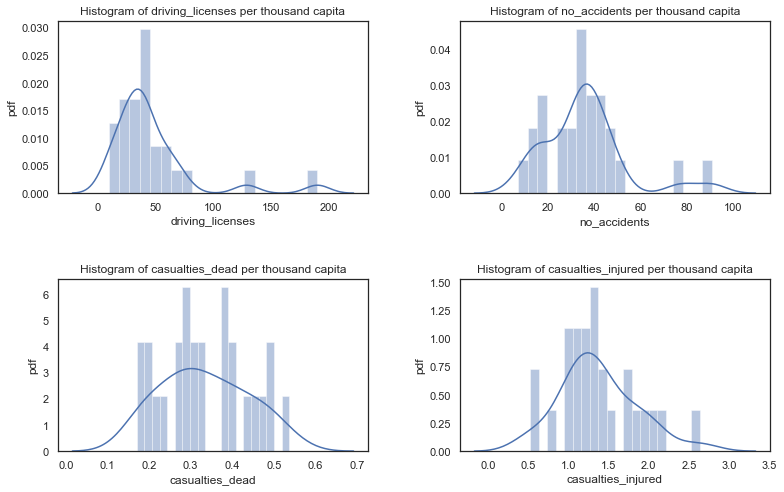

In [80]:
# let's try the distribution of variables again after adjustment using our own function, then with boxplots
plt_columns = ['driving_licenses', 'no_accidents', 'casualties_dead', 'casualties_injured']
subplot_histograms(combined_per_k, plt_columns, ["Histogram of " + column + " per thousand capita" for column in plt_columns], plt_columns)

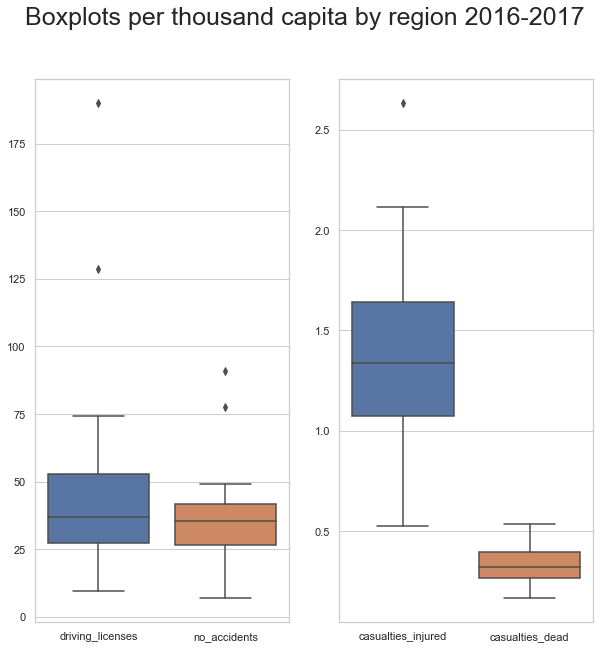

In [81]:
sns.set(style="whitegrid")
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,10))
fig.suptitle('Boxplots per thousand capita by region 2016-2017', fontsize=25)
sns.boxplot(data=combined_per_k[['driving_licenses', 'no_accidents']], ax=ax[0])
sns.boxplot(data=combined_per_k[['casualties_injured', 'casualties_dead']], ax=ax[1]);

### We can see that the distributions are much closer to normal now that we adjusted for population, especially when looking at casualty statistics

In [82]:
# lets look at the adjusted summary statistics, the mean and median are much closer than before adjusting
combined_per_k.describe().iloc[:,1:].T

,count,mean,std,min,25%,50%,75%,max
driving_licenses,26.0,46.458079,38.125942,9.344050,27.252789,37.021221,52.706825,189.964208
no_accidents,26.0,35.846010,18.300843,7.099997,26.431552,35.262745,41.839280,91.017568
casualties_dead,26.0,0.334079,0.105078,0.170272,0.270054,0.319925,0.396279,0.537253
casualties_injured,26.0,1.371729,0.478978,0.525737,1.075454,1.338472,1.643297,2.630879


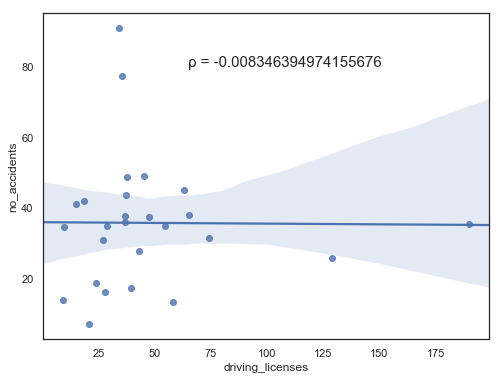

In [83]:
# now lets see whether there is a correlation between adjusted driving licenses issued and the # of accidents
sns.set(style='white')
plt.figure(figsize=(8,6))
sns.regplot(combined_per_k.driving_licenses, combined_per_k.no_accidents)
plt.gca().text(65, 80, 'ρ = '+str(np.corrcoef(combined_per_k.driving_licenses, combined_per_k.no_accidents)[0,1]), fontsize=15);

### with these results, it seems that driving licenses issued and # of accidents are independent of each other, and that driving licenses would not be a good predictor of accidents in KSA

#### Statistical Evaluation of Distributions 

**If you feel it's appropriate**, using methods we discussed in class, run hypothesis tests to compare variables of interest in our dataset. 

### Now let's test whether the new fines as described here http://live.saudigazette.com.sa/article/164574/New-traffic-laws-in-15-days had an effect on the number of accidents between 2016 & 2017

In [84]:
# first lets look at total accidents and see if there was any decrease
tot_acc = combined.groupby('year')[['no_accidents']].sum()
tot_acc

,no_accidents
year,
2016,533380
2017,460488


In [85]:
# we notice a 13.7% decrease in total accidents
(tot_acc.iloc[0,0] - tot_acc.iloc[1,0]) / tot_acc.iloc[0,0]

0.13666054220255727

In [86]:
# lets look at the per thousand capita rate next
tot_acc = combined_per_k.groupby('year')[['no_accidents']].mean()
tot_acc

,no_accidents
year,
2016,39.133883
2017,32.558136


In [87]:
# we observe a decrease of almost 17% for the mean rate across regions
(tot_acc.iloc[0,0] - tot_acc.iloc[1,0]) / tot_acc.iloc[0,0]

0.1680320574187913

In [88]:
# let's test whether this difference in mean is due to random chance
# We hypothesize that the mean difference between the per capita accidents in 2016 & 2017 is zero, with a significance level of .05

acc_per_k2016 = combined_per_k.no_accidents[combined_per_k.year == 2016].values
acc_per_k2017 = combined_per_k.no_accidents[combined_per_k.year == 2017].values

In [89]:
# lets get the tscore and p-value
t_test_result = stats.ttest_ind(acc_per_k2016, acc_per_k2017)
t_test_result.statistic, t_test_result.pvalue

(0.9130206041099985, 0.3703129051377466)

We cannot reject the null hypothesis due to the high p-value and therefore cannot conclude that this decrease between years can be attributed to the increase in fines

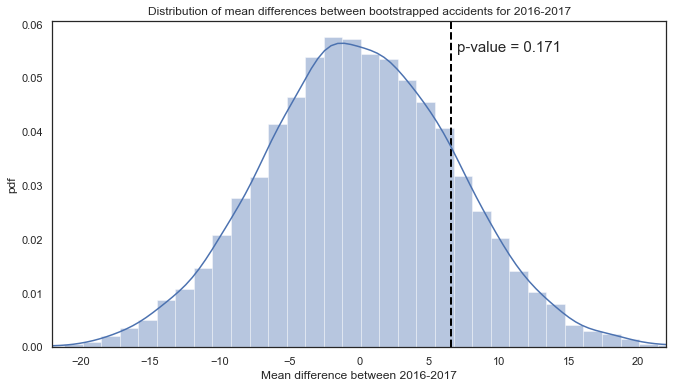

In [90]:
# let's try the bootstrap method, we should still get a p-value above our significance threshold
acc_diff_mean = acc_per_k2016.mean() - acc_per_k2017.mean()
acc_combined_mean = np.concatenate((acc_per_k2016, acc_per_k2017)).mean()

# adjust to new mean
acc_per_k2016_shifted = acc_per_k2016 - acc_per_k2016.mean() + acc_combined_mean
acc_per_k2017_shifted = acc_per_k2017 - acc_per_k2017.mean() + acc_combined_mean

#init lists and do random choice
k2016_replicates = np.empty(10000)
k2017_replicates = np.empty(10000)

np.random.seed(42)
for i in range(10000):
    k2016_replicates[i] = np.random.choice(acc_per_k2016_shifted, size=len(acc_per_k2016_shifted)).mean()
    k2017_replicates[i] = np.random.choice(acc_per_k2017_shifted, size=len(acc_per_k2017_shifted)).mean()

# plot the distribution of bs_diff and acc_diff_mean line
bs_diff = k2016_replicates - k2017_replicates
plt.figure(figsize=(11,6))
plt.gca().set_xlim(-22,22)
plt.gca().set_xlabel('Mean difference between 2016-2017')
plt.gca().set_ylabel('pdf')
plt.gca().set_title('Distribution of mean differences between bootstrapped accidents for 2016-2017')
plt.gca().axvline(acc_diff_mean, color='black', lw=2, linestyle='--')
plt.gca().text(7, .055, 'p-value = ' + str((bs_diff >= acc_diff_mean).sum() / len(bs_diff)), fontsize=15)
sns.distplot(bs_diff, bins=40);

In [91]:
# calculate bootstrap p-value
bs_pvalue = (bs_diff >= acc_diff_mean).sum() / len(bs_diff)
bs_pvalue

0.171

### As expected the bootstrap method also yields a p-value higher than our significance level and thus we cannot reject the null hypothesis

## Conclusions and Recommendations

- Based on your exploration of the data, what are you key takeaways and recommendations?
- Are there additional data you desire that would better inform your investigations?

Answer: